In [37]:
import numpy as np
import pandas as pd 
import random

<h3> Function to generate data f(x) = cos(2*pi*x) + x/(2*pi) + Noise

In [2]:
#Data Generator
def f_x(n):
    y_all = []
    noises = np.random.normal(0,0.004,n)
    random.shuffle(noises)
    deg = np.linspace(0,181,n)
    value_x = np.radians(deg)
    for x,noise in zip(value_x,noises):
        y = np.cos(2*(np.pi)*x) + x/(2*np.pi) + noise
        y_all.append(y)
    return value_x,y_all


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
samples = 20
x_values , y = f_x(samples)

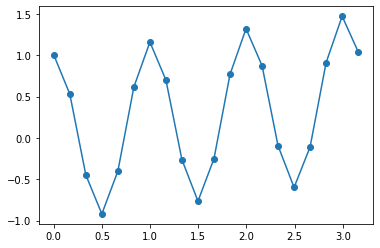

In [5]:
plt.scatter(x_values, y)
plt.plot(x_values, y)


In [39]:
list_M = [1,2,3,5,7,10]

#predict given X and weights
def predict_normal(X, weights):
    return X @ weights

#calculate mean square loss
def Loss_normal(weights, X, y):
    return 1/2 * np.mean(np.square(predict_normal(X, weights) - y))

#function to find weights using Normal equation
def weights_normal(X,y):
    weights = np.linalg.pinv(X.T @ X) @ X.T @ y
    return weights


<h3> Function to generate feature vector and optimal Weights given input vector and Degree of polynomial

In [7]:
def X_W_list(X,y,list_M):
    X_list = []
    W_normal_list = []
    for M in list_M:
        X_copy = X.copy()
        m , n = X.shape
        X_copy = np.hstack((np.ones((m, 1)), X))
        for i in range(2,M+1):
            X_copy = np.hstack((X_copy, (X_copy[:, 1] ** i).reshape((m, 1))))
        X_copy[:, 1:] = (X_copy[:, 1:] - np.mean(X_copy[:, 1:], axis=0)) / np.std(X_copy[:, 1:], axis=0)
        X_list.append(X_copy)
#         print(X_copy)
        W_normal_list.append(weights_normal(X_copy,y))
        
    return X_list , W_normal_list
 


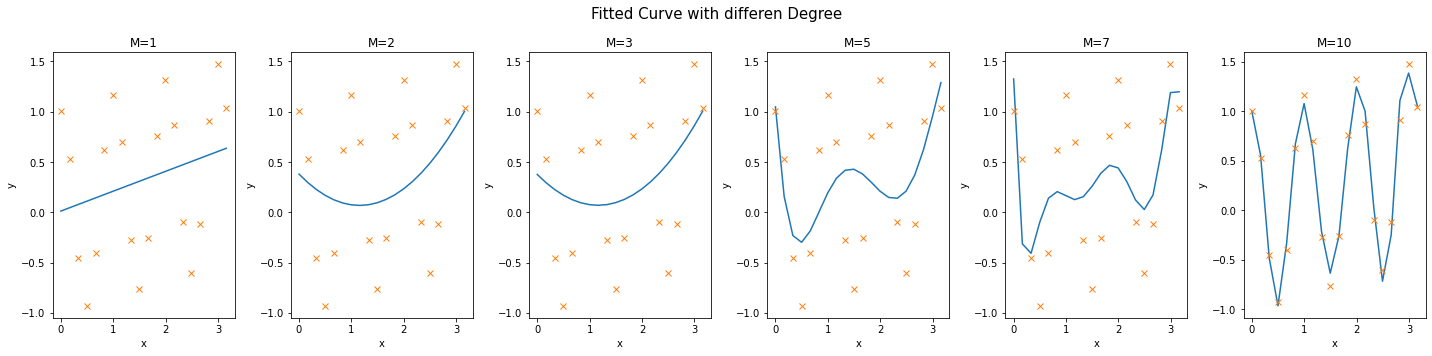

In [8]:
samples = 20
x_values , y = f_x(samples)
X = np.array([x_values]).T
y = np.array(y)

X_list , W_normal_list = X_W_list(X,y,list_M)     
prediction_list = []
for w , X in zip(W_normal_list,X_list):
    prediction_list.append(predict_normal(X,w))
        
fig = plt.figure(figsize=(20, 5))
count = 1
fig.suptitle("Fitted Curve with differen Degree",fontsize=15)
for data,i in zip(prediction_list,list_M):
    ax = fig.add_subplot(1,len(list_M),count)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("M="+str(i))
    ax.plot(x_values , data)
    ax.plot(x_values,y,'x')
    count +=1

plt.tight_layout()
plt.show()

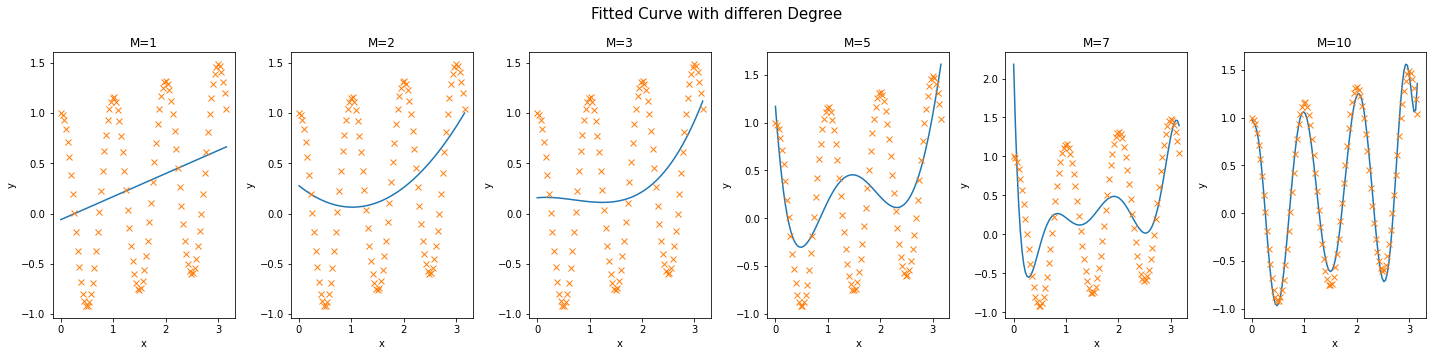

In [9]:
samples = 100
x_values , y = f_x(samples)
X = np.array([x_values]).T
y = np.array(y)

X_list , W_normal_list = X_W_list(X,y,list_M)     
prediction_list = []
for w , X in zip(W_normal_list,X_list):
    prediction_list.append(predict_normal(X,w))
        
fig = plt.figure(figsize=(20, 5))
count = 1
fig.suptitle("Fitted Curve with differen Degree",fontsize=15)
for data,i in zip(prediction_list,list_M):
    ax = fig.add_subplot(1,len(list_M),count)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("M="+str(i))
    ax.plot(x_values , data)
    ax.plot(x_values,y,'x')
    count +=1

plt.tight_layout()
plt.show()

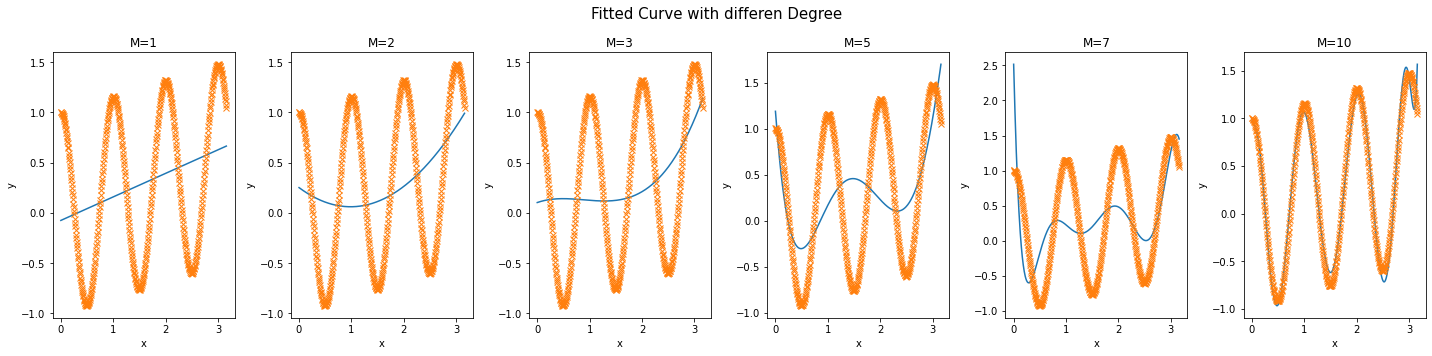

In [10]:
samples = 500
x_values , y = f_x(samples)
X = np.array([x_values]).T
y = np.array(y)

X_list , W_normal_list = X_W_list(X,y,list_M)     
# print(W_normal_list)
prediction_list = []
for w , X in zip(W_normal_list,X_list):
    prediction_list.append(predict_normal(X,w))
        
fig = plt.figure(figsize=(20, 5))
count = 1
fig.suptitle("Fitted Curve with differen Degree",fontsize=15)
for data,i in zip(prediction_list,list_M):
    ax = fig.add_subplot(1,len(list_M),count)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("M="+str(i))
    ax.plot(x_values , data)
    ax.plot(x_values,y,'x')
    count +=1

plt.tight_layout()
plt.show()

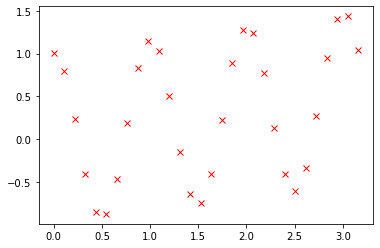

In [41]:
samples = 30
x_values , y = f_x(samples)
X = np.array([x_values]).T
y = np.array(y)
plt.plot(X, y, 'rx')

<h3> Using gradient Descent to fit the polynomial

In [30]:
def predict(X, weights):
    return X @ weights

def Loss(weights, X, y):
    return 1/2 * np.mean(np.square(predict(X, weights) - y))

def PolyCurveFit(X,y , M,alpha = 0.0001,iteration=500,showloss=False):
    m , n = X.shape
    X = np.hstack((np.ones((m, 1)), X))
    for i in range(2,M+1):
        X = np.hstack((X, (X[:, 1] ** i).reshape((m, 1))))
    X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
    weights = np.ones(X.shape[1])
    weights = weights - alpha * (1/m) * (X.T @ ((X @ weights) - y))
    losses = []
    for _ in range(iteration):
        weights = weights - alpha * (1/m) * (X.T @ ((X @ weights) - y))
        if showloss == True:
            print(Loss(weights,X,y),end = "->")
        losses.append(Loss(weights, X, y))
    return X,weights,losses
    

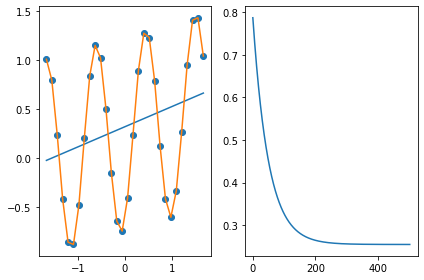

In [31]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,1,alpha = 1e-2,iteration=500,showloss=False)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,501)], losses)

plt.tight_layout()
plt.show()


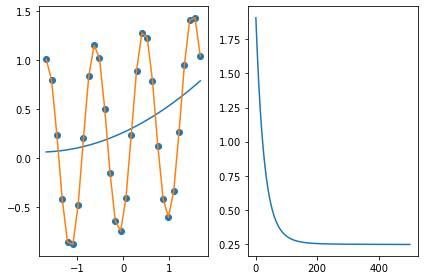

In [32]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,2,alpha = 1e-2,iteration=500,showloss=False)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,501)], losses)

plt.tight_layout()
plt.show()


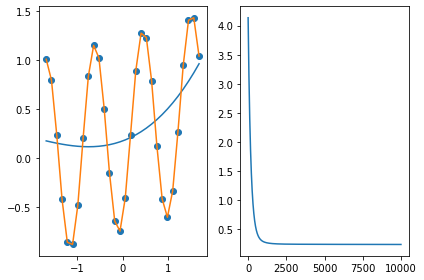

In [33]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,3,alpha = 1e-3,iteration=10000,showloss=False)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,10001)], losses)

plt.tight_layout()
plt.show()


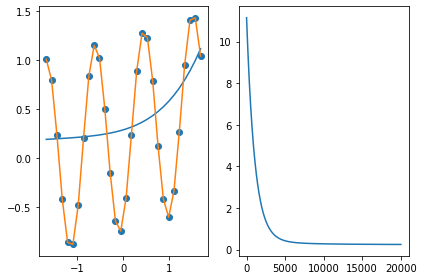

In [34]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,5,alpha = 1e-4,iteration=20000,showloss=False)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,20001)], losses)

plt.tight_layout()
plt.show()


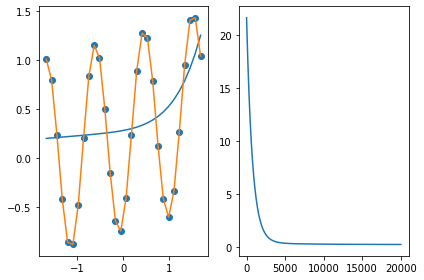

In [35]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,7,alpha = 1e-4,iteration=20000,showloss=False)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,20001)], losses)

plt.tight_layout()
plt.show()


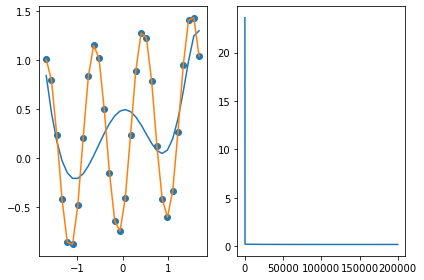

In [36]:
X_feature, weight_GD,losses = PolyCurveFit(X,y,10,alpha = 0.2,iteration=200000,showloss=False)
mypredictions = predict(X_feature, weight_GD)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_feature[:, 1], mypredictions, label='predictions')
ax1.scatter(X_feature[:, 1], y)
ax1.plot(X_feature[:, 1], y)
ax2.plot([i for i in range(1,200001)], losses)

plt.tight_layout()
plt.show()
